In [1]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


## Preliminaries

In [2]:

no_data_ex=5858 
no_data_validation=0 
no_data_test=0 


wheretosave='/home/ubuntu/Notebooks/kdd_soffa_preconv_data.mat'




In [3]:
import scipy.io as sio
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import h5py
import hdf5storage
from __future__ import division

In [4]:

datapath='/home/ubuntu/Notebooks/cell10_x_train.mat'
ydatapath='/home/ubuntu/Notebooks/cell10_y_train.mat'


f = h5py.File(datapath, 'r')
list(f.keys())

[u'#refs#', u'AllStim']

## Handle training data: Stimuli

In [5]:

numpix=30 #41 #206
numpixrow=30

In [6]:
data_of_interest_reference = f['AllStim'][7, 0]
data_of_interest = f[data_of_interest_reference]
print(shape(data_of_interest))

(210, 1000)


In [7]:

        
x_train = np.zeros((no_data_ex, shape(data_of_interest)[1], numpixrow)) #in this case the stim is 8 pixels
for n in range(no_data_ex):#loop over the training examples
    stimref=f['AllStim'][n, 0]
    xxxx=np.transpose(f[stimref])
    xxx=np.reshape(xxxx, (-1, 210))#we flatten each NxM frame into a NM array.

    for m in range(numpixrow):
        x_train[n, :, m] = np.sum(xxx[:, 80+(m*2):80+(m*2)+4],1)/4.0 
        
                   
ds=2 #downsample factor



print(shape(x_train)) 


x_train=sign(x_train)

print(np.average(x_train))
print(np.min((x_train)))
print(np.max(x_train))

(5858, 1000, 30)
-0.00020715830203710026
-1.0
1.0


In [11]:

filter_data=sio.loadmat('/home/ubuntu/Notebooks/keat_filters.mat')



bip_filters=np.transpose(filter_data['onfiltbank'])
ds=2 #downsample factor
bip_filters=bip_filters[::ds, :]
bip_filtersize=shape(bip_filters)[0]
bip_filters=np.transpose(bip_filters)

print(bip_filtersize)
bip_filters=np.reshape(bip_filters, [16, bip_filtersize, 1, 1, 1])

bip_filtersize=shape(bip_filters)[1]



238


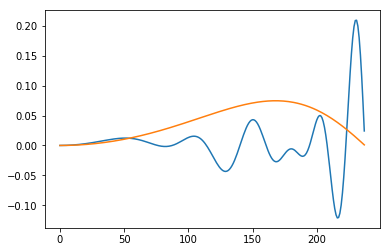

In [12]:
plt.figure()
plt.plot(squeeze(bip_filters[10, :, :, :, :]))
plt.plot(squeeze(bip_filters[0, :, :, :, :]))



In [13]:


def pbconv2d(x, W, batchsize):
    padsize=238 #150 
    paddedx=tf.pad(x, [[0, 0], [padsize, 0], [0, 0], [0, 0]], 'CONSTANT')
    outconv=tf.nn.conv2d(paddedx, W, strides=[1, 1, 1, 1], padding='SAME') #250 for movingdot and noise
    return tf.reshape(outconv[:, np.round(padsize/2).astype(int):np.round(padsize/2).astype(int)+shape(x_train)[1], :, 0],\
                      [batchsize, shape(x_train)[1], -1, 1])



In [14]:
genx_ = tf.placeholder("float", name="input_generation")
batchsize_ = tf.placeholder("int32", name="batch_size")



input1 = tf.reshape(genx_, [batchsize_, x_train.shape[1], -1, 1])


filtforconv=reshape(bip_filters[0, :, :, :, :], [bip_filtersize, 1, 1, 1])
output_1 = pbconv2d(input1 , filtforconv, batchsize_)
# output_1 = tf.reshape(temp_output_1, [1, x_train.shape[1]])

filtforconv=reshape(bip_filters[1, :, :, :, :], [bip_filtersize, 1, 1, 1])
output_2 = pbconv2d(input1 , filtforconv, batchsize_)
# output_2 = tf.reshape(temp_output_1, [1, x_train.shape[1]])

filtforconv=reshape(bip_filters[2, :, :, :, :], [bip_filtersize, 1, 1, 1])
output_3 = pbconv2d(input1 , filtforconv, batchsize_)
# output_3 = tf.reshape(temp_output_1, [1, x_train.shape[1]])

filtforconv=reshape(bip_filters[3, :, :, :, :], [bip_filtersize, 1, 1, 1])
output_4 = pbconv2d(input1 , filtforconv, batchsize_)
# output_1 = tf.reshape(temp_output_1, [1, x_train.shape[1]])

filtforconv=reshape(bip_filters[4, :, :, :, :], [bip_filtersize, 1, 1, 1])
output_5 = pbconv2d(input1 , filtforconv, batchsize_)
# output_2 = tf.reshape(temp_output_1, [1, x_train.shape[1]])

filtforconv=reshape(bip_filters[5, :, :, :, :], [bip_filtersize, 1, 1, 1])
output_6 = pbconv2d(input1 , filtforconv, batchsize_)
# output_3 = tf.reshape(temp_output_1, [1, x_train.shape[1]])

filtforconv=reshape(bip_filters[6, :, :, :, :], [bip_filtersize, 1, 1, 1])
output_7 = pbconv2d(input1 , filtforconv, batchsize_)
# output_1 = tf.reshape(temp_output_1, [1, x_train.shape[1]])

filtforconv=reshape(bip_filters[7, :, :, :, :], [bip_filtersize, 1, 1, 1])
output_8 = pbconv2d(input1 , filtforconv, batchsize_)
# output_2 = tf.reshape(temp_output_1, [1, x_train.shape[1]])

filtforconv=reshape(bip_filters[8, :, :, :, :], [bip_filtersize, 1, 1, 1])
output_9 = pbconv2d(input1 , filtforconv, batchsize_)
# output_3 = tf.reshape(temp_output_1, [1, x_train.shape[1]])

filtforconv=reshape(bip_filters[9, :, :, :, :], [bip_filtersize, 1, 1, 1])
output_10 = pbconv2d(input1 , filtforconv, batchsize_)
# output_1 = tf.reshape(temp_output_1, [1, x_train.shape[1]])

filtforconv=reshape(bip_filters[10, :, :, :, :], [bip_filtersize, 1, 1, 1])
output_11 = pbconv2d(input1 , filtforconv, batchsize_)
# output_2 = tf.reshape(temp_output_1, [1, x_train.shape[1]])

filtforconv=reshape(bip_filters[11, :, :, :, :], [bip_filtersize, 1, 1, 1])
output_12 = pbconv2d(input1 , filtforconv, batchsize_)
# output_3 = tf.reshape(temp_output_1, [1, x_train.shape[1]])

filtforconv=reshape(bip_filters[12, :, :, :, :], [bip_filtersize, 1, 1, 1])
output_13 = pbconv2d(input1 , filtforconv, batchsize_)
# output_1 = tf.reshape(temp_output_1, [1, x_train.shape[1]])

filtforconv=reshape(bip_filters[13, :, :, :, :], [bip_filtersize, 1, 1, 1])
output_14 = pbconv2d(input1 , filtforconv, batchsize_)
# output_2 = tf.reshape(temp_output_1, [1, x_train.shape[1]])

filtforconv=reshape(bip_filters[14, :, :, :, :], [bip_filtersize, 1, 1, 1])
output_15 = pbconv2d(input1 , filtforconv, batchsize_)
# output_2 = tf.reshape(temp_output_1, [1, x_train.shape[1]])

filtforconv=reshape(bip_filters[15, :, :, :, :], [bip_filtersize, 1, 1, 1])
output_16 = pbconv2d(input1 , filtforconv, batchsize_)
# output_2 = tf.reshape(temp_output_1, [1, x_train.shape[1]])





In [15]:
gensess=tf.Session()
gensess.run(tf.global_variables_initializer())


fd = {genx_: x_train}

In [18]:
dur=shape(x_train)[1]

all_output_1=np.zeros([no_data_ex, dur, numpixrow])
all_output_2=np.zeros([no_data_ex, dur, numpixrow])
all_output_3=np.zeros([no_data_ex, dur, numpixrow])
all_output_4=np.zeros([no_data_ex, dur, numpixrow])
all_output_5=np.zeros([no_data_ex, dur, numpixrow])
all_output_6=np.zeros([no_data_ex, dur, numpixrow])
all_output_7=np.zeros([no_data_ex, dur, numpixrow])
all_output_8=np.zeros([no_data_ex, dur, numpixrow])
all_output_9=np.zeros([no_data_ex, dur, numpixrow])
all_output_10=np.zeros([no_data_ex, dur, numpixrow])
all_output_11=np.zeros([no_data_ex, dur, numpixrow])
all_output_12=np.zeros([no_data_ex, dur, numpixrow])
all_output_13=np.zeros([no_data_ex, dur, numpixrow])
all_output_14=np.zeros([no_data_ex, dur, numpixrow])
all_output_15=np.zeros([no_data_ex, dur, numpixrow])
all_output_16=np.zeros([no_data_ex, dur, numpixrow])


batchsz=5
for bbatch in range(int(floor(no_data_ex/5.0))):
    startind=(bbatch)*batchsz
    endind=(bbatch+1)*batchsz
    fd = {batchsize_: batchsz, genx_: x_train[startind:endind, :, :]}
    o_output_11 =gensess.run([output_1], feed_dict=fd)
    all_output_1[startind:endind,:, :]=np.reshape(o_output_11, [batchsz, dur, numpixrow])
    
    o_output_21 =gensess.run([output_2], feed_dict=fd)
    all_output_2[startind:endind,:, :]=np.reshape(o_output_21, [batchsz, dur, numpixrow])
    
    o_output_31 =gensess.run([output_3], feed_dict=fd)
    all_output_3[startind:endind,:, :]=np.reshape(o_output_31, [batchsz, dur, numpixrow])
    
    o_output_41 =gensess.run([output_4], feed_dict=fd)
    all_output_4[startind:endind,:, :]=np.reshape(o_output_41, [batchsz, dur, numpixrow])
    
    o_output_51 =gensess.run([output_5], feed_dict=fd)
    all_output_5[startind:endind,:, :]=np.reshape(o_output_51, [batchsz, dur, numpixrow])
    
    o_output_61 =gensess.run([output_6], feed_dict=fd)
    all_output_6[startind:endind,:, :]=np.reshape(o_output_61, [batchsz, dur, numpixrow])
    
    o_output_71 =gensess.run([output_7], feed_dict=fd)
    all_output_7[startind:endind,:, :]=np.reshape(o_output_71, [batchsz, dur, numpixrow])
    
    o_output_81 =gensess.run([output_8], feed_dict=fd)
    all_output_8[startind:endind,:, :]=np.reshape(o_output_81, [batchsz, dur, numpixrow])
    
    o_output_91 =gensess.run([output_9], feed_dict=fd)
    all_output_9[startind:endind,:, :]=np.reshape(o_output_91, [batchsz, dur, numpixrow])
    
    o_output_101 =gensess.run([output_10], feed_dict=fd)
    all_output_10[startind:endind,:, :]=np.reshape(o_output_101, [batchsz, dur, numpixrow])
    
    o_output_111 =gensess.run([output_11], feed_dict=fd)
    all_output_11[startind:endind,:, :]=np.reshape(o_output_111, [batchsz, dur, numpixrow])
    
    o_output_121 =gensess.run([output_12], feed_dict=fd)
    all_output_12[startind:endind,:, :]=np.reshape(o_output_121, [batchsz, dur, numpixrow])
    
    o_output_131 =gensess.run([output_13], feed_dict=fd)
    all_output_13[startind:endind,:, :]=np.reshape(o_output_131, [batchsz, dur, numpixrow])
    
    o_output_141 =gensess.run([output_14], feed_dict=fd)
    all_output_14[startind:endind,:, :]=np.reshape(o_output_141, [batchsz, dur, numpixrow])
    
    o_output_151 =gensess.run([output_15], feed_dict=fd)
    all_output_15[startind:endind,:, :]=np.reshape(o_output_151, [batchsz, dur, numpixrow])
    
    o_output_161 =gensess.run([output_16], feed_dict=fd)
    all_output_16[startind:endind,:, :]=np.reshape(o_output_161, [batchsz, dur, numpixrow])
    
    




In [22]:


import h5py
import hdf5storage


td={}
td[u'x_train']=x_train

td[u'bip_filters']=bip_filters

td[u'b1_input']=all_output_1
td[u'b2_input']=all_output_2
td[u'b3_input']=all_output_3
td[u'b4_input']=all_output_4
td[u'b5_input']=all_output_5
td[u'b6_input']=all_output_6
td[u'b7_input']=all_output_7
td[u'b8_input']=all_output_8
td[u'b9_input']=all_output_9
td[u'b10_input']=all_output_10
td[u'b11_input']=all_output_11
td[u'b12_input']=all_output_12
td[u'b13_input']=all_output_13
td[u'b14_input']=all_output_14
td[u'b15_input']=all_output_15
td[u'b16_input']=all_output_16


hdf5storage.savemat(wheretosave, td, format='7.3', oned_as='column', store_python_metadata=True)
